In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers

Using TensorFlow backend.


In [2]:
v = np.linspace(0,2*np.pi,21)
N = np.random.normal( loc = 0, scale = 0.20, size = (2000,21) )
base_sin = np.sin(v)
base_cos = np.cos(v)

In [4]:
X_sin = base_sin + N[0:1000,:]
X_cos = base_cos + N[1000:2000,:]
print(X_sin.shape)

(1000, 21)


In [15]:
i = 3
plt.plot(X_sin[i,:], X_cos[i,:])

IndexError: index 1200 is out of bounds for axis 0 with size 1000

In [6]:
X_noise = np.random.normal(loc=0, scale = 0.75, size = (20000,21))

In [7]:
X_sin[0,:]

array([ 0.12628383,  0.53867812,  0.70025346,  0.91052836,  1.0152851 ,
        0.94108005,  0.63580779,  0.96293032,  0.66099256,  0.21653768,
        0.01833231, -0.333329  , -0.5976598 , -0.67738963, -1.06462253,
       -1.0132854 , -1.11490907, -0.43594056, -0.81594693, -0.39864467,
       -0.07727343])

In [8]:
X = []
y = []

for i in range(1000):
    X.append((np.stack([X_sin[i,:],X_cos[i,:]], axis = 0).T).reshape(1,21,2))
    y.append(1)

for i in range(10000):
    X.append((np.stack([X_noise[i,:],X_noise[i+10000,:]], axis = 0).T).reshape(1,21,2))
    y.append(0)    

(11000, 21, 2) (21, 2) (21,)
(11000,)


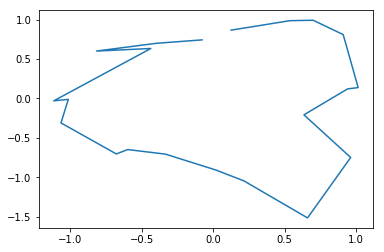

In [11]:
X = np.zeros((11000,21,2))
y = np.zeros(11000)


for i in range(1000):
    X[i] = np.stack([X_sin[i,:],X_cos[i,:]], axis = 0).T
    y[i] = 1

for i in range(10000):
    X[i+1000] = np.stack([X_noise[i,:],X_noise[i+10000,:]], axis = 0).T

print(X.shape, X[0].shape, X[0,:,0].shape)
plt.plot(X[0,:,0],X[0,:,1])

print(y.shape)

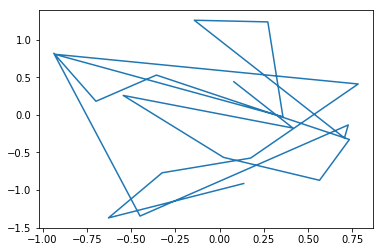

In [19]:
i = 1400
plt.plot(X[i,:,0], X[i,:,1])

In [12]:
model = models.Sequential()
model.add(layers.LSTM(21, input_shape=(21,2)))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 21)                2016      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 22        
Total params: 2,038
Trainable params: 2,038
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X,y, epochs=3, batch_size = 32)

Epoch 1/3
11000/11000 [==============================] - 3s 300us/step - loss: 0.1382 - acc: 0.9575
Epoch 2/3
11000/11000 [==============================] - 3s 238us/step - loss: 0.0076 - acc: 0.9988
Epoch 3/3
11000/11000 [==============================] - 3s 239us/step - loss: 0.0019 - acc: 1.0000


In [14]:
for i in range(980,1020):
    print(model.predict(X[i].reshape(1,21,2)))

[[0.9903526]]
[[0.988489]]
[[0.988641]]
[[0.98911905]]
[[0.9917462]]
[[0.99043256]]
[[0.9910849]]
[[0.9895291]]
[[0.9905494]]
[[0.9916741]]
[[0.9896734]]
[[0.9899552]]
[[0.9908276]]
[[0.99067044]]
[[0.9900119]]
[[0.98959994]]
[[0.98867875]]
[[0.99017906]]
[[0.99131787]]
[[0.9914113]]
[[0.00017651]]
[[0.00023962]]
[[0.0003138]]
[[0.00024329]]
[[0.00020125]]
[[0.00021207]]
[[0.00026832]]
[[0.00022144]]
[[0.00020225]]
[[0.00022259]]
[[0.00018442]]
[[0.00016377]]
[[0.0002289]]
[[0.00024861]]
[[0.00013237]]
[[0.00017029]]
[[0.00015069]]
[[0.00022785]]
[[0.00027248]]
[[0.00023901]]
